In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
white_wine = pd.read_csv('C:\Asus WebStorage\psabin@gmail.com\MySyncFolder\Data Science Course\BlueBerry Winery\winequality-white.csv', sep=';')

In [3]:
red_wine = pd.read_csv('C:\Asus WebStorage\psabin@gmail.com\MySyncFolder\Data Science Course\BlueBerry Winery\winequality-red.csv', sep=';')

In [4]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

In [5]:
display(red_wine.head())
display(white_wine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


In [6]:
all_wine = pd.concat([red_wine, white_wine])
display(all_wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  quality_label         6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


None

In [14]:
comparison = pd.concat([
    red_wine[['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']].describe(),
    white_wine[['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']].describe()
], axis=1, keys=["Red Wines Stats", "White Wines Stats"])
display(comparison)

Red Wines Stats                                                 \
       residual sugar total sulfur dioxide    sulphates      alcohol   
count     1599.000000          1599.000000  1599.000000  1599.000000   
mean         2.538806            46.467792     0.658149    10.422983   
std          1.409928            32.895324     0.169507     1.065668   
min          0.900000             6.000000     0.330000     8.400000   
25%          1.900000            22.000000     0.550000     9.500000   
50%          2.200000            38.000000     0.620000    10.200000   
75%          2.600000            62.000000     0.730000    11.100000   
max         15.500000           289.000000     2.000000    14.900000   

                                    White Wines Stats                       \
      volatile acidity      quality    residual sugar total sulfur dioxide   
count      1599.000000  1599.000000       4898.000000          4898.000000   
mean          0.527821     5.636023          6.391415           138.360657   
std           0.179060     0.807569          5.072058            42.498065   
min           0.120000     3.000000          0.600000             9.000000   
25%           0.390000     5.000000          1.700000           108.000000   
50%           0.520000     6.000000          5.200000           134.000000   
75%           0.640000     6.000000          9.900000           167.000000   
max           1.580000     8.000000         65.800000           440.000000   

                                                               
         sulphates      alcohol volatile acidity      quality  
count  4898.000000  4898.000000      4898.000000  4898.000000  
mean      0.489847    10.514267         0.278241     5.877909  
std       0.114126     1.230621         0.100795     0.885639  
min       0.220000     8.000000         0.080000     3.000000  
25%       0.410000     9.500000         0.210000     5.000000  
50%       0.470000    10.400000         0.260000     6.000000  
75%       0.550000    11.400000         0.320000     6.000000  
max       1.080000    14.200000         1.100000     9.000000

Red wine: + sulphates, ++ volatile acidity

White wine: ++ residual sugar (massive max - outlier?), ++ sulfur dioxide, slight + quality

RED investigate: 
1. citric acid max
2. residual sugar max
3. chlorides max
4. total sulfur dioxide: some above legal limit in EU of 160
5. sulphates max

([<matplotlib.patches.Wedge at 0x1fdaefd61a0>,
 [Text(0.790055695856868, 0.76538356230332, 'Red'),
  Text(-0.7900556600266768, -0.7653835992884954, 'White')])

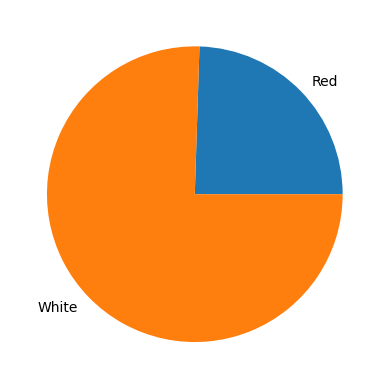

In [16]:
labels = 'Red', 'White'
sizes = [1589, 4898]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [32]:
display(red_wine.info())
display(white_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_label         1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  quality_label         4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


None

In [ ]:
quality_order = ['low', 'medium', 'high']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Plot for Red Wine
sns.histplot(data=red_wine, x='quality_label', ax=axes[0], cat_order=quality_order)
axes[0].set_title('Red Wine Quality')

# Plot for White Wine
sns.histplot(data=white_wine, x='quality_label', ax=axes[1], cat_order=quality_order)
axes[1].set_title('White Wine Quality')

plt.tight_layout()


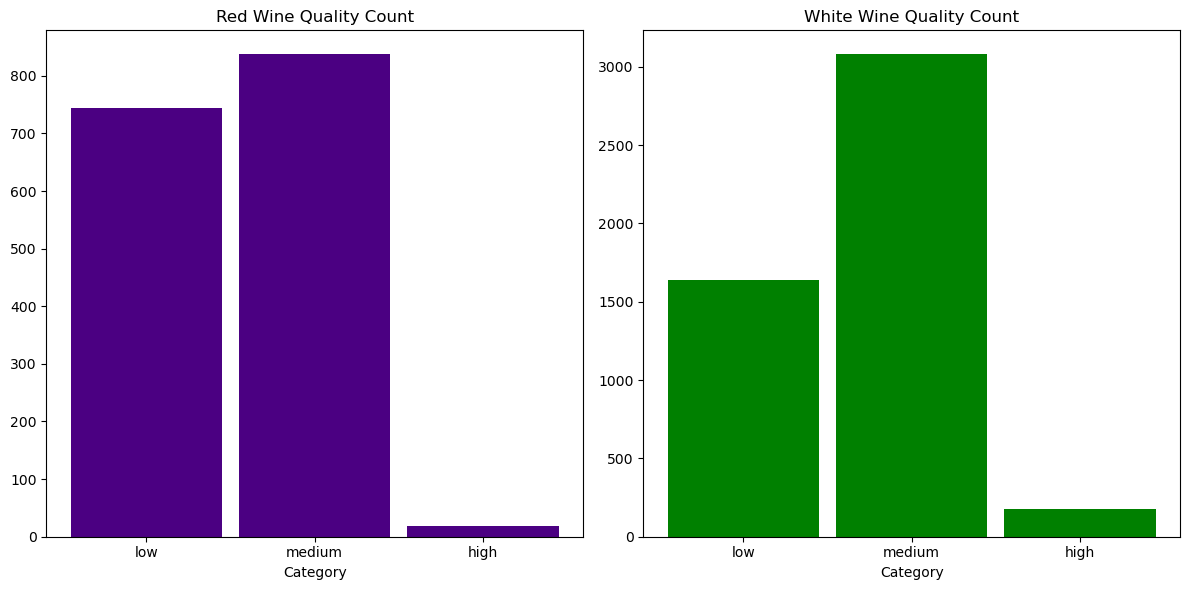

In [30]:
# Get counts for red wine
red_count_series = red_wine['quality_label'].value_counts().reindex(['low', 'medium', 'high'])

# Get counts for white wine
white_count_series = white_wine['quality_label'].value_counts().reindex(['low', 'medium', 'high'])

# x and y coordinates for red and white wine
x_red = red_count_series.index
y_red = red_count_series.values

x_white = white_count_series.index
y_white = white_count_series.values

# Initialize subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for Red Wine
axes[0].bar(x_red, y_red, width=0.9, color='indigo')
axes[0].set_title('Red Wine Quality Count')
axes[0].set_xlabel('Category')

# Bar chart for White Wine
axes[1].bar(x_white, y_white, width=0.9, color='green')
axes[1].set_title('White Wine Quality Count')
axes[1].set_xlabel('Category')

# Display plots
plt.tight_layout()
plt.show()


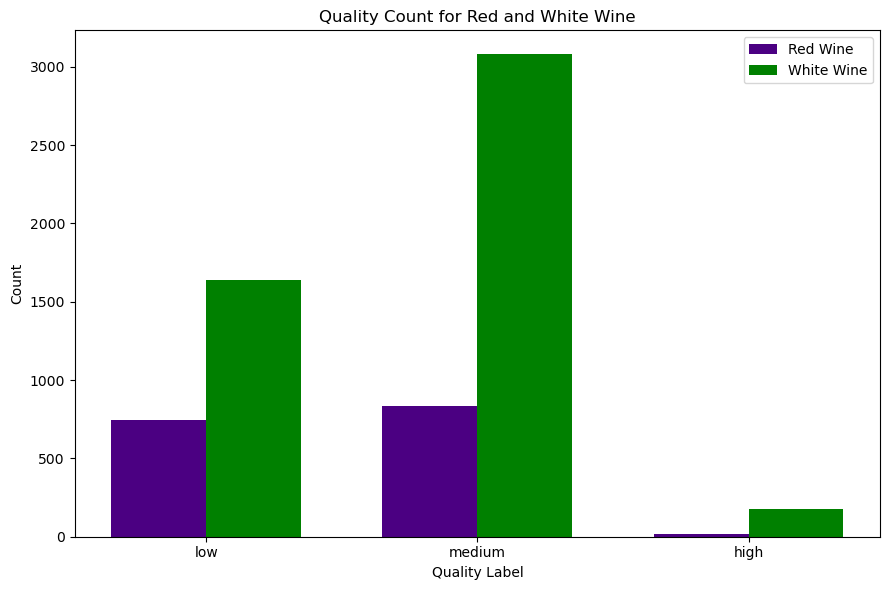

In [31]:
# Get counts for red wine
red_count_series = red_wine['quality_label'].value_counts().reindex(['low', 'medium', 'high'])

# Get counts for white wine
white_count_series = white_wine['quality_label'].value_counts().reindex(['low', 'medium', 'high'])

# x and y coordinates for red and white wine
labels = ['low', 'medium', 'high']
red_counts = red_count_series.values
white_counts = white_count_series.values

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(9, 6))

# Plot the bars
rects1 = ax.bar(x - width/2, red_counts, width, label='Red Wine', color='indigo')
rects2 = ax.bar(x + width/2, white_counts, width, label='White Wine', color='green')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_title('Quality Count for Red and White Wine')
ax.set_xlabel('Quality Label')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


In [33]:
display(all_wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  quality_label         6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


None

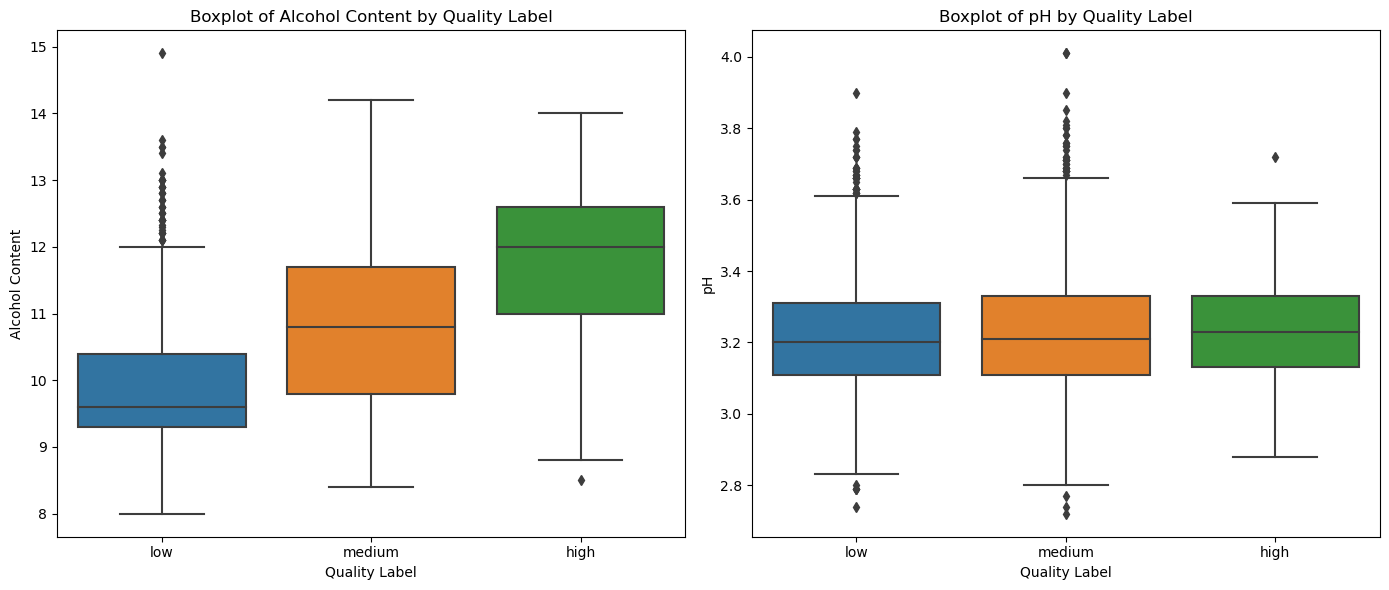

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='quality_label', y='alcohol', data=all_wine, ax=axes[0])
axes[0].set_title('Boxplot of Alcohol Content by Quality Label')
axes[0].set_xlabel('Quality Label')
axes[0].set_ylabel('Alcohol Content')

sns.boxplot(x='quality_label', y='pH', data=all_wine, ax=axes[1])
axes[1].set_title('Boxplot of pH by Quality Label')
axes[1].set_xlabel('Quality Label')
axes[1].set_ylabel('pH')

plt.tight_layout()
plt.show()


In [38]:
Q1 = white_wine['residual sugar'].quantile(0.25)
Q3 = white_wine['residual sugar'].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Q1: 1.7
Q3: 9.9
IQR: 8.200000000000001
Lower Whisker: -10.600000000000001
Upper Whisker: 22.200000000000003


Text(0.5, 1.0, 'Box Plot of Residual Sugar in White Wine')

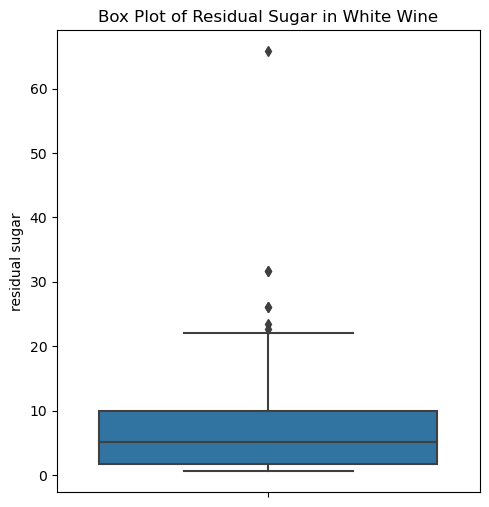

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='residual sugar', data=white_wine)
plt.title('Box Plot of Residual Sugar in White Wine')

In [40]:
# Assuming you've already calculated Q1, Q3, lower_whisker, and upper_whisker

# Outliers below the lower whisker
outliers_lower = white_wine['residual sugar'] < lower_whisker

# Outliers above the upper whisker
outliers_upper = white_wine['residual sugar'] > upper_whisker

# Total number of outliers
total_outliers = sum(outliers_lower) + sum(outliers_upper)

print(f"Number of lower outliers: {sum(outliers_lower)}")
print(f"Number of upper outliers: {sum(outliers_upper)}")
print(f"Total number of outliers: {total_outliers}")


Number of lower outliers: 0
Number of upper outliers: 7
Total number of outliers: 7


Text(0.5, 1.0, 'Histogram and KDE of Residual Sugar in White Wine')

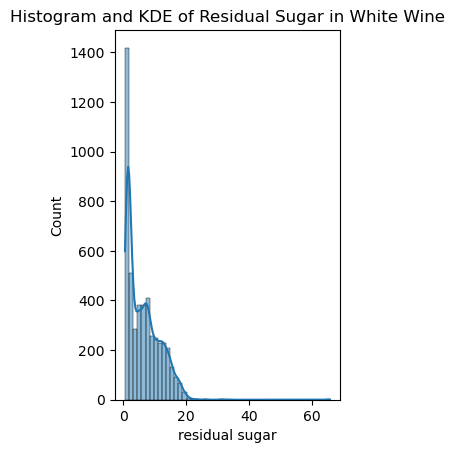

In [41]:
# Histogram with KDE
plt.subplot(1, 2, 2)
sns.histplot(white_wine['residual sugar'], bins=50, kde=True)
plt.title('Histogram and KDE of Residual Sugar in White Wine')

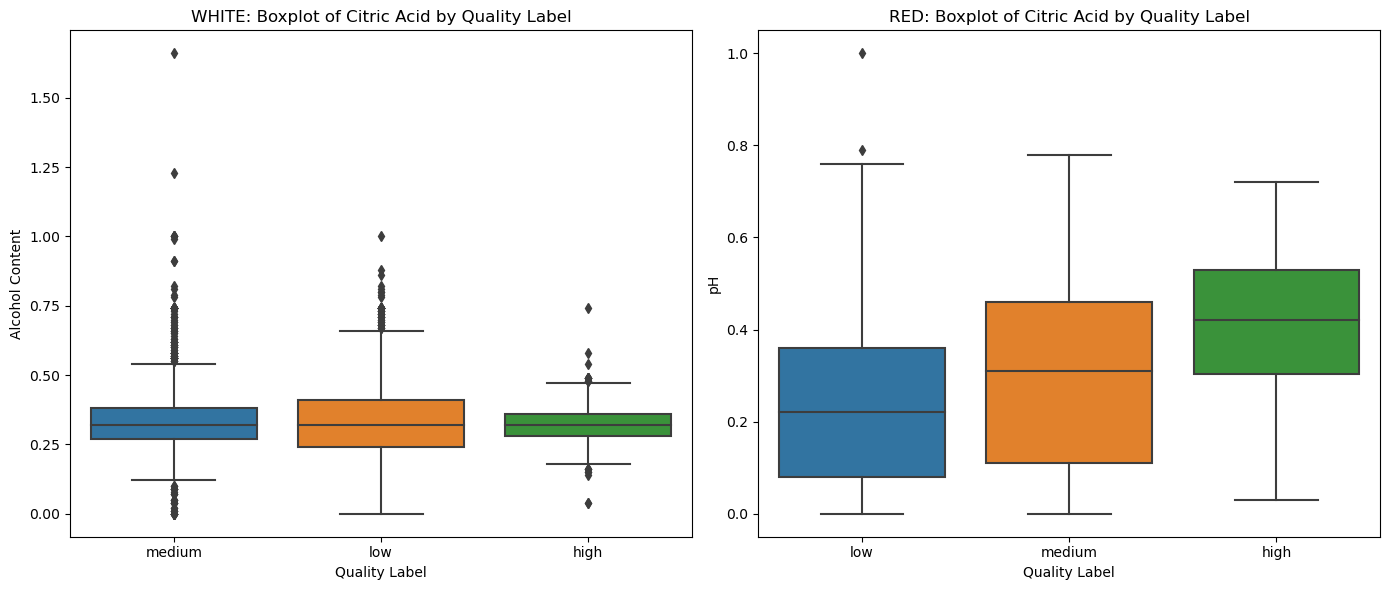

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='quality_label', y='citric acid', data=white_wine, ax=axes[0])
axes[0].set_title('WHITE: Boxplot of Citric Acid by Quality Label')
axes[0].set_xlabel('Quality Label')
axes[0].set_ylabel('Alcohol Content')

sns.boxplot(x='quality_label', y='citric acid', data=red_wine, ax=axes[1])
axes[1].set_title('RED: Boxplot of Citric Acid by Quality Label')
axes[1].set_xlabel('Quality Label')
axes[1].set_ylabel('pH')

plt.tight_layout()
plt.show()

In [44]:
white_wine['zero_citric_flag'] = (white_wine['citric acid'] == 0).astype(int)
red_wine['zero_citric_flag'] = (red_wine['citric acid'] == 0).astype(int)


In [48]:
display(white_wine['zero_citric_flag'].value_counts())
display(red_wine['zero_citric_flag'].value_counts())

zero_citric_flag
0    4879
1      19
Name: count, dtype: int64

zero_citric_flag
0    1467
1     132
Name: count, dtype: int64

In [49]:
zero_citric_white = white_wine[white_wine['zero_citric_flag'] == 1]
non_zero_citric_white = white_wine[white_wine['zero_citric_flag'] == 0]
zero_citric_red = red_wine[red_wine['zero_citric_flag'] == 1]
non_zero_citric_red = red_wine[red_wine['zero_citric_flag'] == 0]


Text(0.5, 1.0, 'Histogram and KDE of Citric Acid in White Wine')

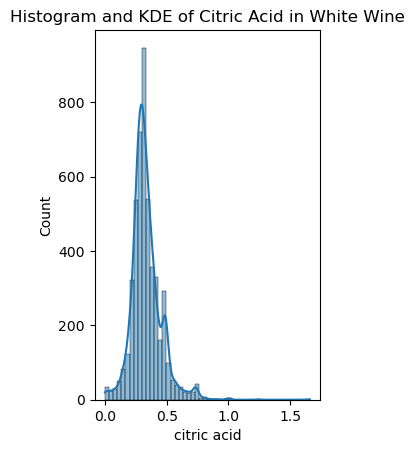

In [50]:
plt.subplot(1, 2, 2)
sns.histplot(white_wine['citric acid'], bins=50, kde=True)
plt.title('Histogram and KDE of Citric Acid in White Wine')

Text(0.5, 1.0, 'Histogram and KDE of Citric Acid in White Wine')

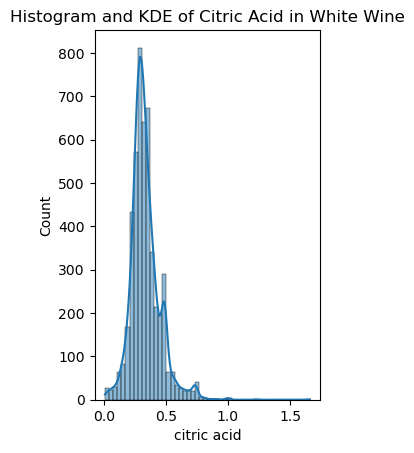

In [51]:
plt.subplot(1, 2, 2)
sns.histplot(non_zero_citric_white['citric acid'], bins=50, kde=True)
plt.title('Histogram and KDE of Citric Acid in White Wine')

Text(0.5, 1.0, 'Histogram and KDE of Citric Acid in White Wine')

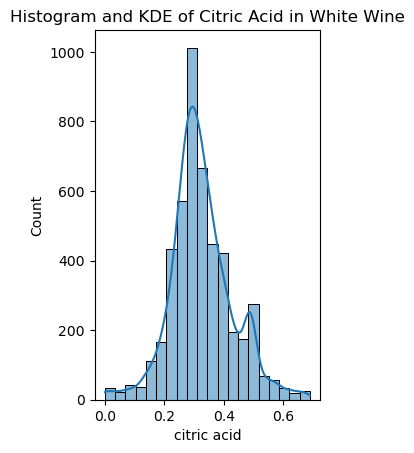

In [60]:
from scipy.stats import zscore




In [61]:
display(filtered_citric_white.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,zero_citric_flag
count,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000
mean,6.846759,0.278235,0.326273,6.358259,0.045443,35.238105,138.053501,0.994001,3.189277,0.489506,10.522788,5.884272,0.003948
std,0.842414,0.100779,0.104800,5.043580,0.020993,17.017244,42.431988,0.002986,0.150341,0.113892,1.228483,0.887774,0.062713
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991700,3.090000,0.410000,9.500000,5.000000,0.000000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993700,3.180000,0.470000,10.400000,6.000000,0.000000
75%,7.300000,0.320000,0.380000,9.800000,0.050000,46.000000,167.000000,0.996040,3.280000,0.550000,11.400000,6.000000,0.000000
max,14.200000,1.100000,0.690000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


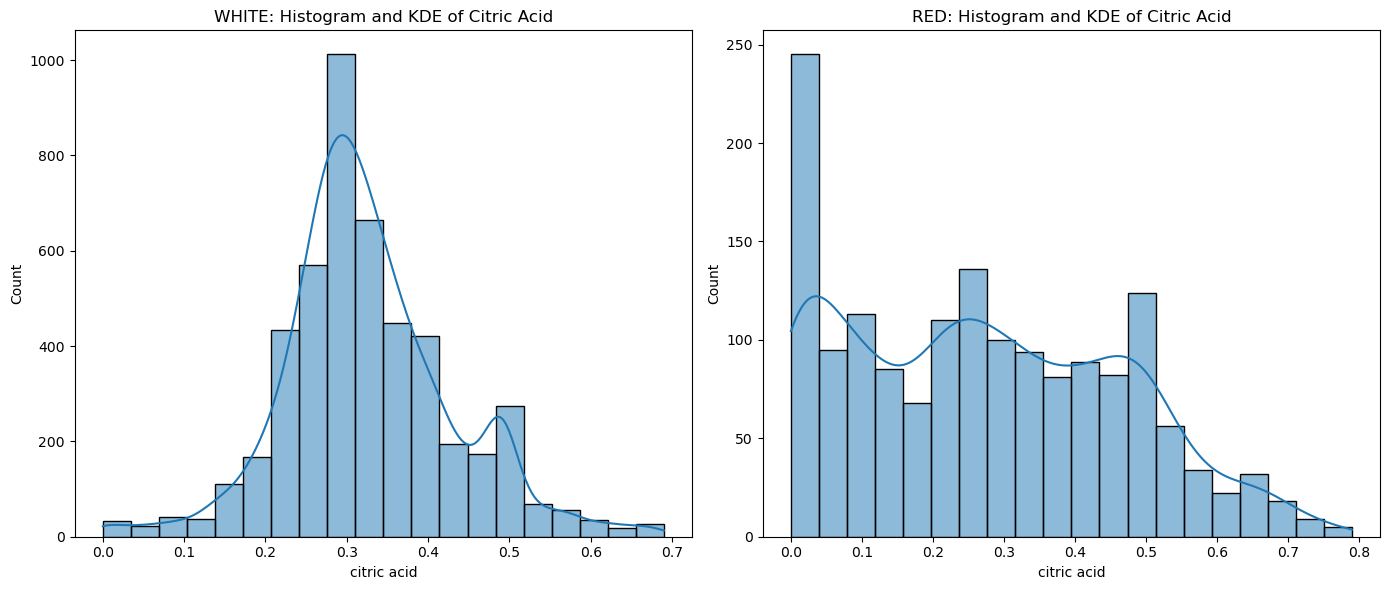

In [63]:
# Calculate Z-scores
citric_z_scores = np.abs(zscore(white_wine['citric acid']))

# Filter out outliers
filtered_citric_white = white_wine[citric_z_scores < 3]

# Calculate Z-scores
red_citric_z_scores = np.abs(zscore(red_wine['citric acid']))

# Filter out outliers
filtered_citric_red = red_wine[red_citric_z_scores < 3]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plt.subplot(1, 2, 2)
sns.histplot(filtered_citric_white['citric acid'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('WHITE: Histogram and KDE of Citric Acid')


plt.subplot(1, 2, 2)
sns.histplot(filtered_citric_red['citric acid'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('RED: Histogram and KDE of Citric Acid')

plt.tight_layout()
plt.show()



In [64]:

correlation_matrix = white_wine[['fixed acidity', 'volatile acidity', 'citric acid']].corr()
display(correlation_matrix)


,fixed acidity,volatile acidity,citric acid
fixed acidity,1.000000,-0.022697,0.289181
volatile acidity,-0.022697,1.000000,-0.149472
citric acid,0.289181,-0.149472,1.000000


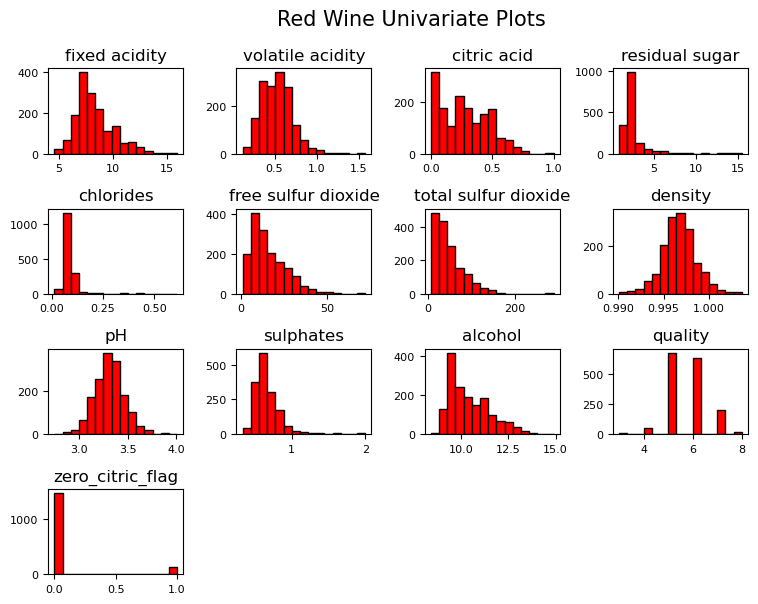

In [65]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

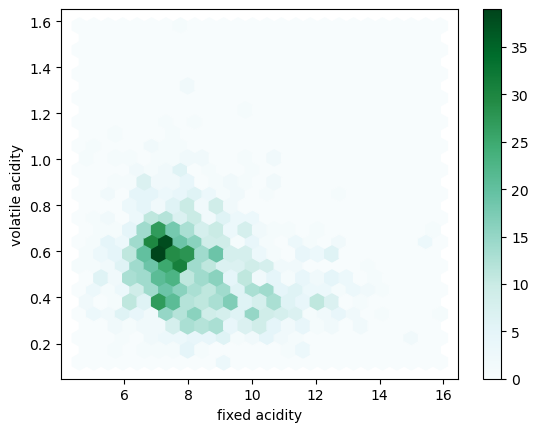

In [66]:
red_wine.plot.hexbin(x='fixed acidity', y='volatile acidity', gridsize=25)


Text(0.65, 1.25, 'Red Wine Boxplots for Numerical Features')

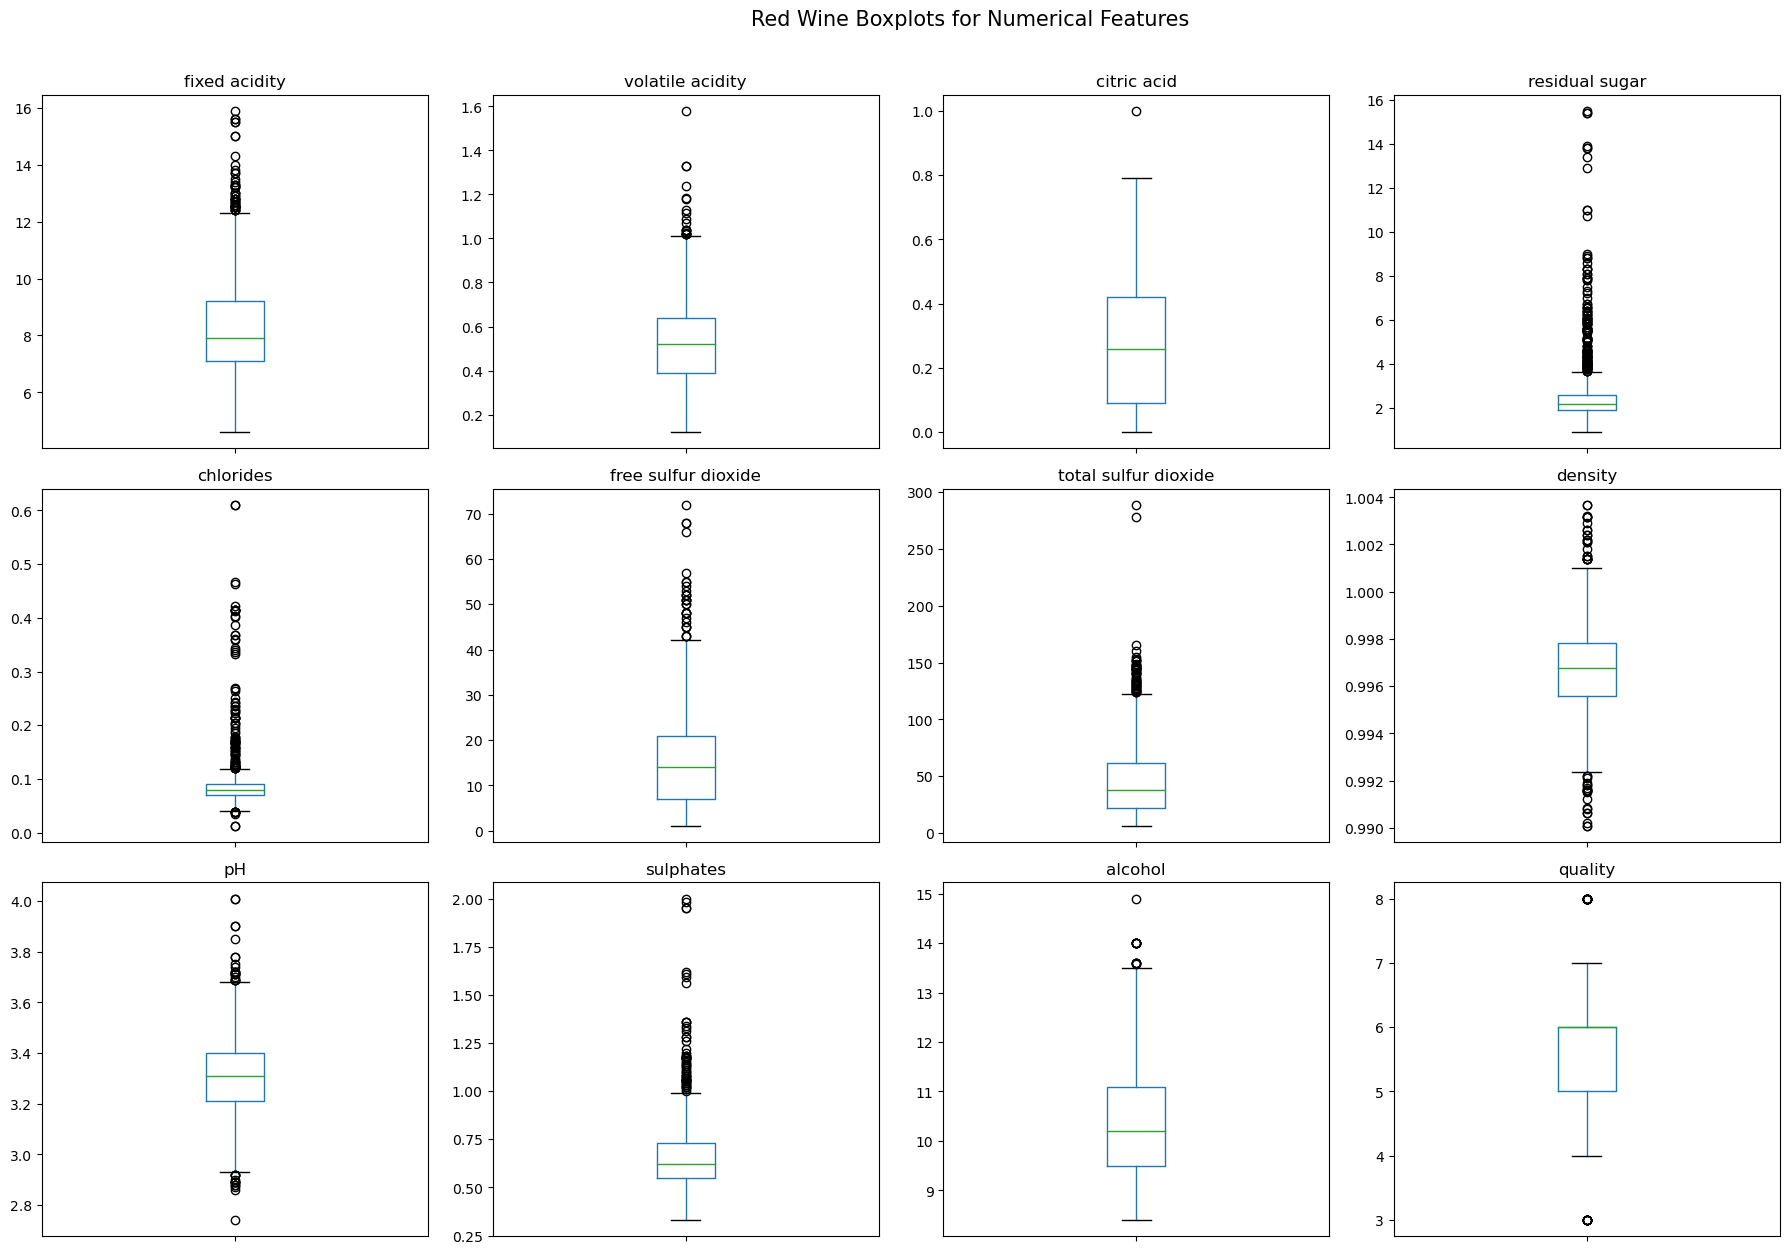

In [71]:
# Define the columns you want to plot
columns_to_plot = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol', 'quality'
]

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Remove any extra subplots
for i in range(len(columns_to_plot), n_rows * n_cols):
    fig.delaxes(axes[i])

# Create boxplot for each specified column
for i, col in enumerate(columns_to_plot):
    red_wine.boxplot(column=col, ax=axes[i], grid=False)
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xticklabels('')

# Customize layout
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

# Add a super title
plt.suptitle('Red Wine Boxplots for Numerical Features', x=0.65, y=1.25, fontsize=15)


Text(0.65, 1.25, 'White Wine Boxplots for Numerical Features')

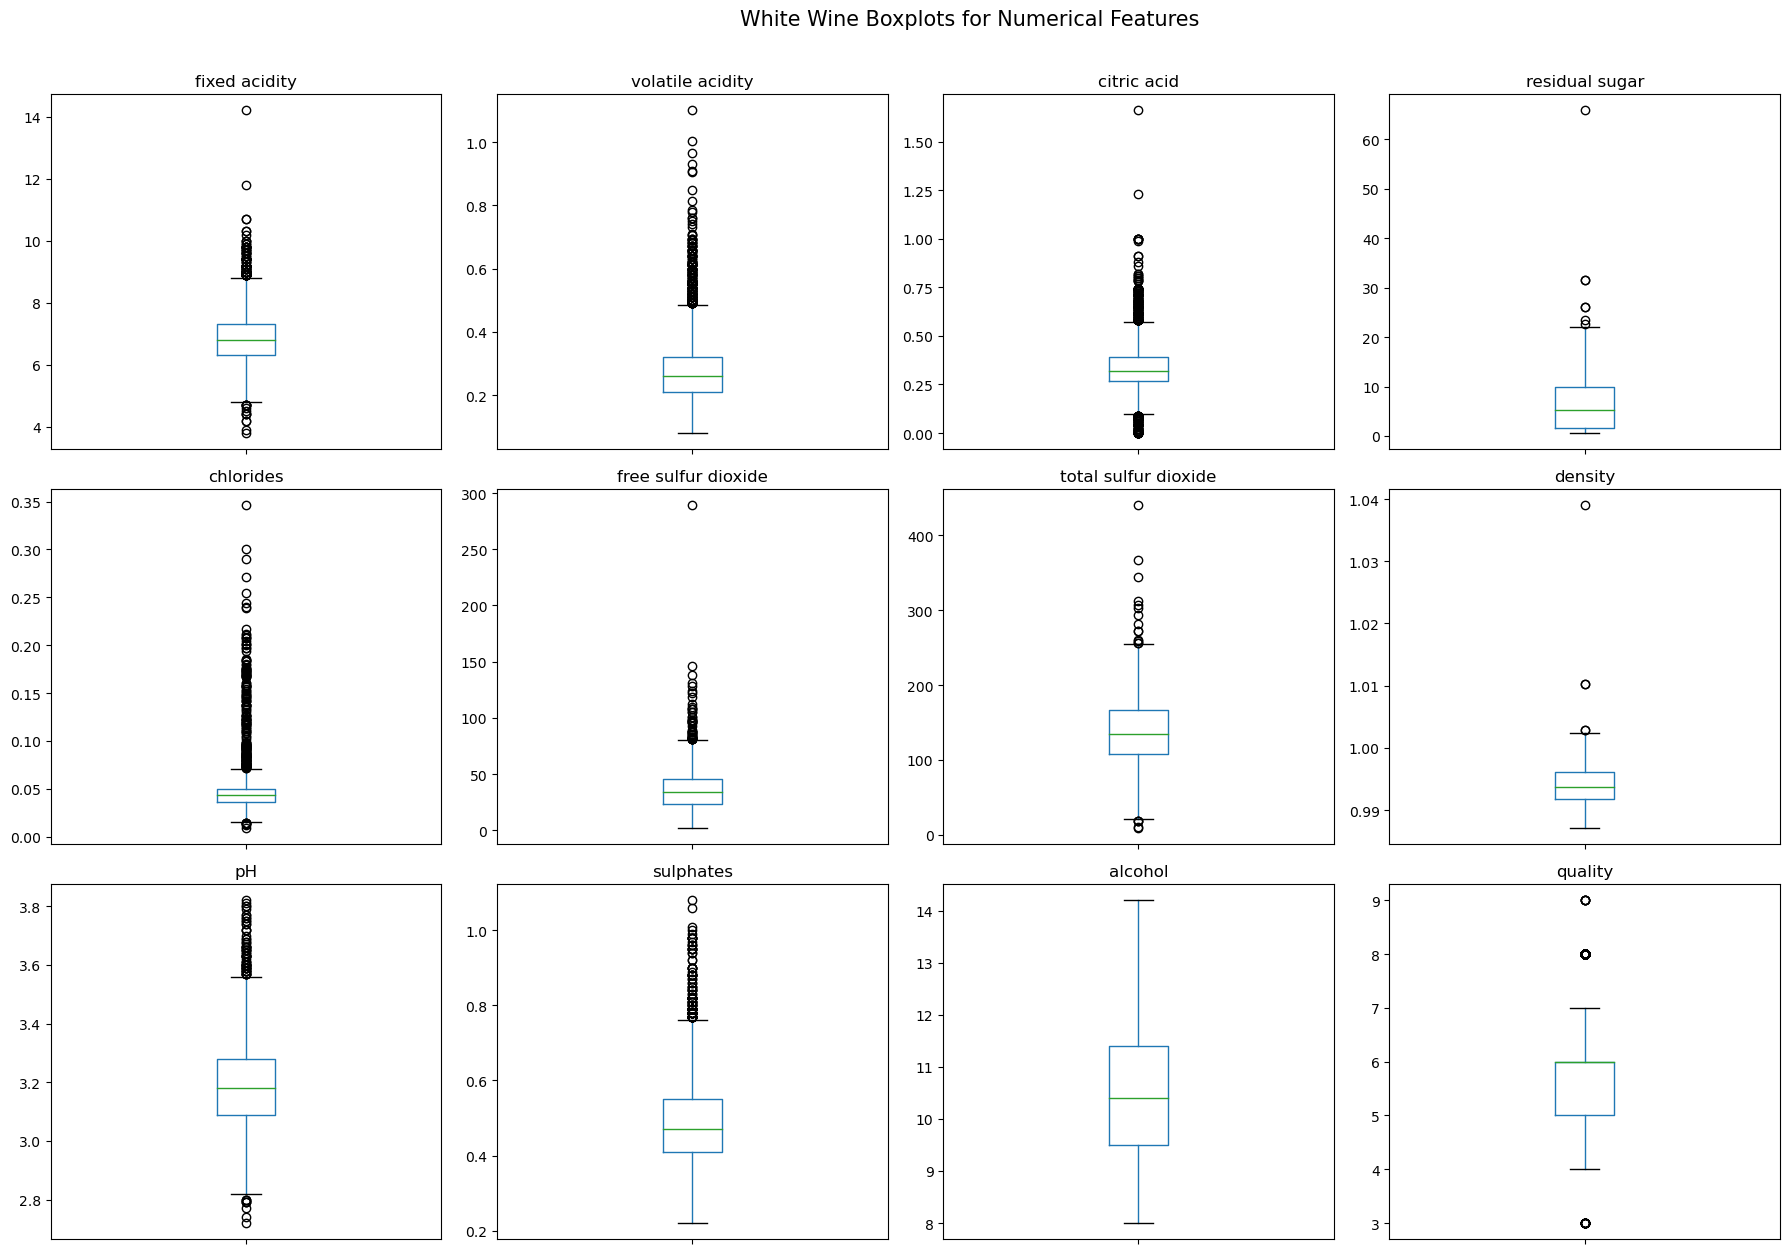

In [73]:
# Define the columns you want to plot
columns_to_plot = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol', 'quality'
]

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Remove any extra subplots
for i in range(len(columns_to_plot), n_rows * n_cols):
    fig.delaxes(axes[i])

# Create boxplot for each specified column
for i, col in enumerate(columns_to_plot):
    white_wine.boxplot(column=col, ax=axes[i], grid=False)
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xticklabels('')

# Customize layout
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

# Add a super title
plt.suptitle('White Wine Boxplots for Numerical Features', x=0.65, y=1.25, fontsize=15)

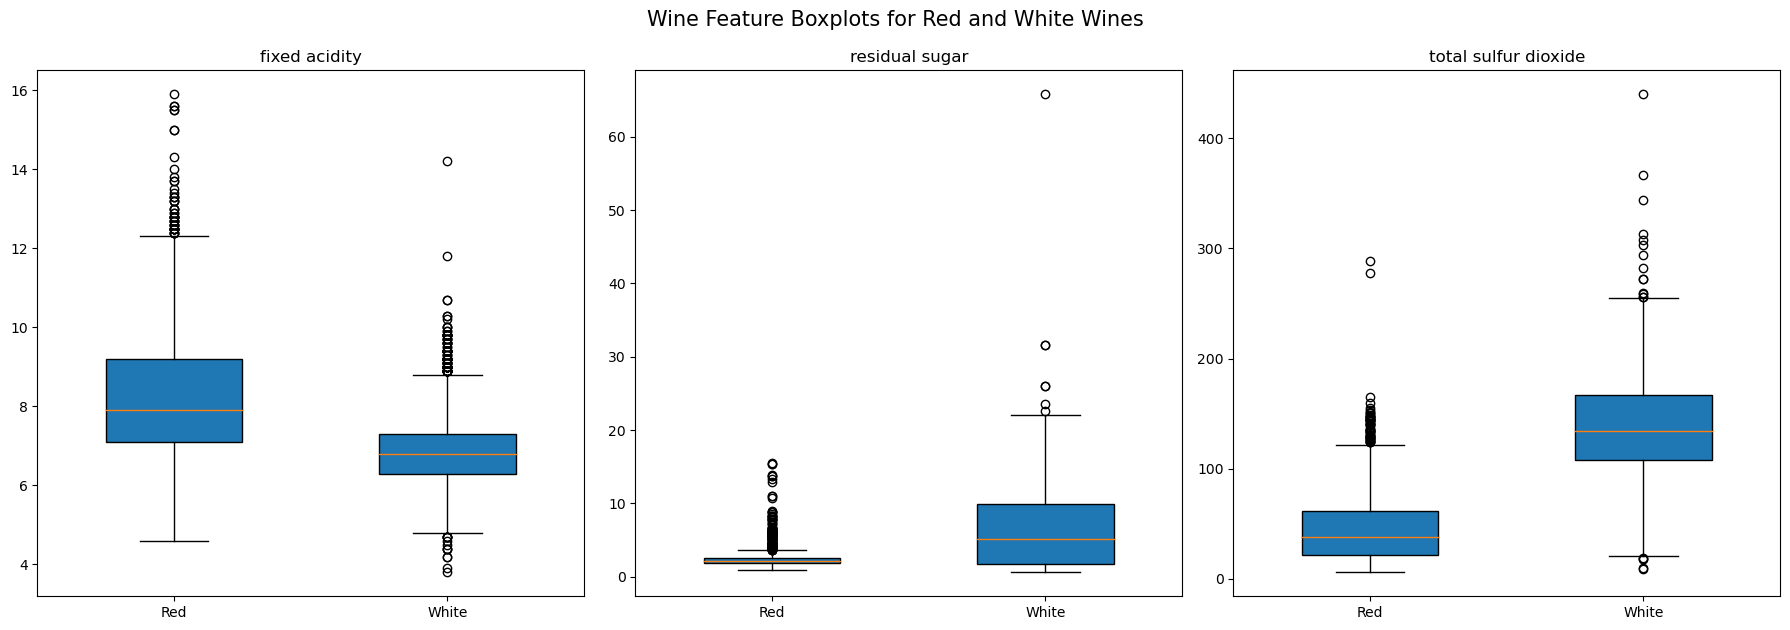

In [86]:
# Define the columns you want to plot
columns_to_plot = [
    'fixed acidity', 'residual sugar',
    'total sulfur dioxide'
]

# Number of rows and columns for your layout
n_rows = 1
n_cols = 3

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5))

# Flatten the axes for easy iteration (not strictly necessary here as you have only one row)
axes = axes.flatten()

# Create boxplot for each specified column
for i, col in enumerate(columns_to_plot):
    data_to_plot = [red_wine[col], white_wine[col]]
    axes[i].boxplot(data_to_plot, labels=['Red', 'White'], widths=0.5, patch_artist=True)
    axes[i].set_title(col, fontsize=12)

# Customize layout
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

# Add a super title
plt.suptitle('Wine Feature Boxplots for Red and White Wines', x=0.6, y=1.25, fontsize=15)

plt.show()


In [90]:
red_wine.drop('zero_citric_flag', axis=1, inplace=True)
display(white_wine.head())
display(red_wine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [ ]:
from scipy.stats import zscore

# Select only numerical columns
numerical_cols = white_wine.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the Z-scores for numerical columns
z_scores = white_wine[numerical_cols].apply(zscore)

# Create a binary DataFrame indicating outliers
outlier_df = (z_scores.abs() >= 3).astype(int)

# Rename columns for clarity
outlier_df.columns = [f"{col}_outlier" for col in outlier_df.columns]



In [95]:
outlier_white_df = outlier_df
display(outlier_white_df.sum())


fixed acidity_outlier            46
volatile acidity_outlier         81
citric acid_outlier              85
residual sugar_outlier            9
chlorides_outlier               102
free sulfur dioxide_outlier      32
total sulfur dioxide_outlier     12
density_outlier                   3
pH_outlier                       32
sulphates_outlier                48
alcohol_outlier                   0
quality_outlier                  25
dtype: int64

In [96]:
# Sum the binary outlier flags for each wine (row)
outlier_white_df['total_outliers'] = outlier_white_df.sum(axis=1)

# Filter the DataFrame to only include wines that are outliers in multiple features
multi_feature_outlier_white = outlier_white_df[outlier_white_df['total_outliers'] > 1]


In [108]:
# Current column order
cols = multi_feature_outlier_white.columns.tolist()

# Move the last column to the first position
cols = [cols[-1]] + cols[:-1]

# Reassign columns
multi_feature_outlier_white = multi_feature_outlier_white[cols]


In [109]:
display(multi_feature_outlier_white.sort_values(by='total_outliers',ascending=False).head(15))

,total_outliers,fixed acidity_outlier,volatile acidity_outlier,citric acid_outlier,residual sugar_outlier,chlorides_outlier,free sulfur dioxide_outlier,total sulfur dioxide_outlier,density_outlier,pH_outlier,sulphates_outlier,alcohol_outlier,quality_outlier
2872,4,1,0,0,0,0,1,0,0,1,1,0,0
4745,3,0,0,0,0,0,1,1,0,0,0,0,1
2668,3,1,1,0,0,0,0,0,0,0,1,0,0
1034,3,0,1,0,0,1,0,0,0,0,0,0,1
1931,3,0,0,0,0,0,1,1,0,0,0,0,1
2781,3,0,1,0,1,0,0,0,1,0,0,0,0
3307,3,1,0,0,0,0,1,0,0,0,0,0,1
207,2,1,0,1,0,0,0,0,0,0,0,0,0
3265,2,1,0,0,0,0,0,0,0,0,0,0,1
2637,2,0,0,1,0,0,0,0,0,0,1,0,0


In [106]:
# Filter out numerical columns
numerical_cols = white_wine.select_dtypes(include=[np.number]).columns

# Calculate the mean and standard deviation for each numerical feature in the original DataFrame
mean_values = white_wine[numerical_cols].mean()
std_values = white_wine[numerical_cols].std()

# Calculate the original data values that correspond to z-scores of -3 and +3
lower_bounds = mean_values - 3 * std_values
upper_bounds = mean_values + 3 * std_values

# Create a DataFrame to display the bounds for each feature
bounds_df = pd.DataFrame({
    'Lower_Bound': lower_bounds,
    'Upper_Bound': upper_bounds
})

display(bounds_df)


,Lower_Bound,Upper_Bound
fixed acidity,4.323183,9.386392
volatile acidity,-0.024143,0.580625
citric acid,-0.028868,0.697251
residual sugar,-8.824758,21.607588
chlorides,-0.019772,0.111316
free sulfur dioxide,-15.713327,86.329497
total sulfur dioxide,10.866464,265.854851
density,0.985055,1.003000
pH,2.735265,3.641268
sulphates,0.147469,0.832224


In [107]:
display(multi_feature_outlier_white.head())
display(white_wine.head())

,fixed acidity_outlier,volatile acidity_outlier,citric acid_outlier,residual sugar_outlier,chlorides_outlier,free sulfur dioxide_outlier,total sulfur dioxide_outlier,density_outlier,pH_outlier,sulphates_outlier,alcohol_outlier,quality_outlier,total_outliers
207,1,0,1,0,0,0,0,0,0,0,0,0,2
294,0,1,0,0,0,0,0,0,0,0,0,1,2
325,0,0,0,0,0,1,1,0,0,0,0,0,2
687,0,1,0,0,1,0,0,0,0,0,0,0,2
873,1,0,0,0,0,0,0,0,0,0,0,1,2


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
